### Analysis of Ad Groups' Performance <br/><br/>

#### Objectives:

> To evaluate and compare the performance of different ad groups based on key metrics: a) return on advertising spend (ROAS), <br/><br/>
> b) advertising cost of sales (ACOS), and c) conversion rate, using a dummy amazon search term report. <br/><br/>


In [1]:
#import usual libraries needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#import the dataset
search_term_report = pd.read_csv("../../Projects_data/6.practice_files/search_term_report_new.csv")
search_term_report.rename(columns= lambda col:col.strip(), inplace=True)
search_term_report.head()

,Start Date,End Date,Campaign Name,Ad Group Name,Targeting,Match Type,Impressions,Clicks,(%) Click-Thru Rate (CTR),($) Cost Per Click (CPC),($) Spend,($) Seven Day Total Sales,(%) Total Advertising Cost of Sales (ACoS),(%) Total Return on Advertising Spend (RoAS),Seven Day Total Orders,Seven Day Total Units,(%) Seven Day Conversion Rate
0,"Feb 28, 2021","Mar 07, 2021",CAMPAIGN_1,AD_GRP_1,dog bed,BROAD,200,7,3.5000%,$0.35,$2.43,$99.88,2.4329%,41.10,6,6,85.7143%
1,"Mar 03, 2021","Mar 03, 2021",CAMPAIGN_1,AD_GRP_1,large dog bed,BROAD,1,1,100.0000%,$0.30,$0.30,$0.00,NaN,0.00,0,0,0.0000%
2,"Feb 28, 2021","Mar 04, 2021",CAMPAIGN_1,AD_GRP_1,small dog bed,BROAD,15,5,33.3333%,$0.44,$2.21,$48.94,4.5157%,22.14,3,3,60.0000%
3,"Mar 07, 2021","Mar 07, 2021",CAMPAIGN_1,AD_GRP_1,comfortable dog bed,BROAD,1,1,100.0000%,$0.59,$0.59,$0.00,NaN,0.00,0,0,0.0000%
4,"Mar 02, 2021","Mar 02, 2021",CAMPAIGN_1,AD_GRP_1,dog mattress,BROAD,1,1,100.0000%,$0.34,$0.34,$0.00,NaN,0.00,0,0,0.0000%


### Part 1: Data Cleanup

##### Change the data type of certain columns

In [120]:
#change the datatype of certain columns 
def change_currency_col_dtype(df, columns_list, currency):
    for col in columns_list:
        df[col] = pd.to_numeric(df[col].str.replace(currency, "")).round(decimals=2) #removes the currency sign 

def change_to_datetime_dtype(df, columns_list, date_format):
    for col in columns_list:
        df[col] = pd.to_datetime(df[col], format=date_format)

#change the data type of columns containing currencies
column_list_a = ["($) Cost Per Click (CPC)", "($) Spend", "($) Seven Day Total Sales"]
change_currency_col_dtype(search_term_report, column_list_a, "$")

#change the data type of columns containing percentage
column_list_b = ["(%) Seven Day Conversion Rate", "(%) Total Advertising Cost of Sales (ACoS)", "(%) Click-Thru Rate (CTR)"]
change_currency_col_dtype(search_term_report, column_list_b, "%")

#change the data type of columns containing dates
column_list_c = ["Start Date", "End Date"]
change_to_datetime_dtype(search_term_report, column_list_c, "%b %d, %Y")

search_term_report.head()

,Start Date,End Date,Campaign Name,Ad Group Name,Targeting,Match Type,Impressions,Clicks,(%) Click-Thru Rate (CTR),($) Cost Per Click (CPC),($) Spend,($) Seven Day Total Sales,(%) Total Advertising Cost of Sales (ACoS),(%) Total Return on Advertising Spend (RoAS),Seven Day Total Orders,Seven Day Total Units,(%) Seven Day Conversion Rate
0,2021-02-28,2021-03-07,CAMPAIGN_1,AD_GRP_1,dog bed,BROAD,200,7,3.50,0.35,2.43,99.88,2.43,41.10,6,6,85.71
1,2021-03-03,2021-03-03,CAMPAIGN_1,AD_GRP_1,large dog bed,BROAD,1,1,100.00,0.30,0.30,0.00,NaN,0.00,0,0,0.00
2,2021-02-28,2021-03-04,CAMPAIGN_1,AD_GRP_1,small dog bed,BROAD,15,5,33.33,0.44,2.21,48.94,4.52,22.14,3,3,60.00
3,2021-03-07,2021-03-07,CAMPAIGN_1,AD_GRP_1,comfortable dog bed,BROAD,1,1,100.00,0.59,0.59,0.00,NaN,0.00,0,0,0.00
4,2021-03-02,2021-03-02,CAMPAIGN_1,AD_GRP_1,dog mattress,BROAD,1,1,100.00,0.34,0.34,0.00,NaN,0.00,0,0,0.00


##### Check for missing values

In [121]:
def check_missing_values(df):
    missing_values = pd.DataFrame({"Total missing values": df.isna().sum(),
                                   "% of missing values": df.isna().sum()/df.count()})
    return missing_values

check_missing_values(search_term_report)

,Total missing values,% of missing values
Start Date,0,0.000000
End Date,0,0.000000
Campaign Name,0,0.000000
Ad Group Name,0,0.000000
Targeting,0,0.000000
Match Type,0,0.000000
Impressions,0,0.000000
Clicks,0,0.000000
(%) Click-Thru Rate (CTR),0,0.000000
($) Cost Per Click (CPC),0,0.000000


In [122]:
#replace the missing ACoS with zero 
search_term_report["(%) Total Advertising Cost of Sales (ACoS)"] = search_term_report["(%) Total Advertising Cost of Sales (ACoS)"].fillna(0)

##### Recalculate the performance metrics

In [123]:
#recalculate the CTR
search_term_report["(%) Click-Thru Rate (CTR)"] = np.where(search_term_report["Impressions"] != 0, (search_term_report["Clicks"]/ search_term_report["Impressions"])*100, 0)

#recalculate the Total ACoS
search_term_report["(%) Total Advertising Cost of Sales (ACoS)"] = np.where(search_term_report["($) Seven Day Total Sales"] != 0, (search_term_report["($) Spend"]/ search_term_report["($) Seven Day Total Sales"])*100, 0)

#recalculate the Total RoAS 
search_term_report["(%) Total Return on Advertising Spend (RoAS)"] = np.where(search_term_report["($) Spend"], (search_term_report["($) Seven Day Total Sales"]/ search_term_report["($) Spend"])*100, 0)

#recalculate the conversion rate 
search_term_report["(%) Seven Day Conversion Rate"] = np.where(search_term_report["Clicks"] != 0, (search_term_report["Seven Day Total Units"]/ search_term_report["Clicks"])*100, 0)

#round up to 2 decimals
column_list_d = ["(%) Click-Thru Rate (CTR)", "(%) Total Advertising Cost of Sales (ACoS)", "(%) Total Return on Advertising Spend (RoAS)", "(%) Seven Day Conversion Rate"]
search_term_report[column_list_d] = search_term_report[column_list_d].round(decimals=2)
search_term_report.head()

,Start Date,End Date,Campaign Name,Ad Group Name,Targeting,Match Type,Impressions,Clicks,(%) Click-Thru Rate (CTR),($) Cost Per Click (CPC),($) Spend,($) Seven Day Total Sales,(%) Total Advertising Cost of Sales (ACoS),(%) Total Return on Advertising Spend (RoAS),Seven Day Total Orders,Seven Day Total Units,(%) Seven Day Conversion Rate
0,2021-02-28,2021-03-07,CAMPAIGN_1,AD_GRP_1,dog bed,BROAD,200,7,3.50,0.35,2.43,99.88,2.43,4110.29,6,6,85.71
1,2021-03-03,2021-03-03,CAMPAIGN_1,AD_GRP_1,large dog bed,BROAD,1,1,100.00,0.30,0.30,0.00,0.00,0.00,0,0,0.00
2,2021-02-28,2021-03-04,CAMPAIGN_1,AD_GRP_1,small dog bed,BROAD,15,5,33.33,0.44,2.21,48.94,4.52,2214.48,3,3,60.00
3,2021-03-07,2021-03-07,CAMPAIGN_1,AD_GRP_1,comfortable dog bed,BROAD,1,1,100.00,0.59,0.59,0.00,0.00,0.00,0,0,0.00
4,2021-03-02,2021-03-02,CAMPAIGN_1,AD_GRP_1,dog mattress,BROAD,1,1,100.00,0.34,0.34,0.00,0.00,0.00,0,0,0.00


##### Add new columns 

In [124]:
#add a new column to indicate whether ACoS is low or high 
search_term_report["(%) Total ACoS Indicator"] = np.where(search_term_report["(%) Total Advertising Cost of Sales (ACoS)"] > 25, "HIGH_ACOS", "LOW_ACOS")

#add a new column to indicate whether ACoS is low or high 
search_term_report["(%) Total RoAS Indicator"] = np.where(search_term_report["(%) Total Return on Advertising Spend (RoAS)"] > 150, "HIGH_ROAS", "LOW_ROAS")

> The goal is to achieve a Total RoAS greater than 150% and a Total ACos that is less than 25% for each keyword. 

> An indicator column helps us keep track of the keywords' performance so we can immediately adjust the bid if necessary. 

### Part 2: Data Exploration

##### Compare the distributions of ACoS, RoAS, and conversion rate across different ad groups

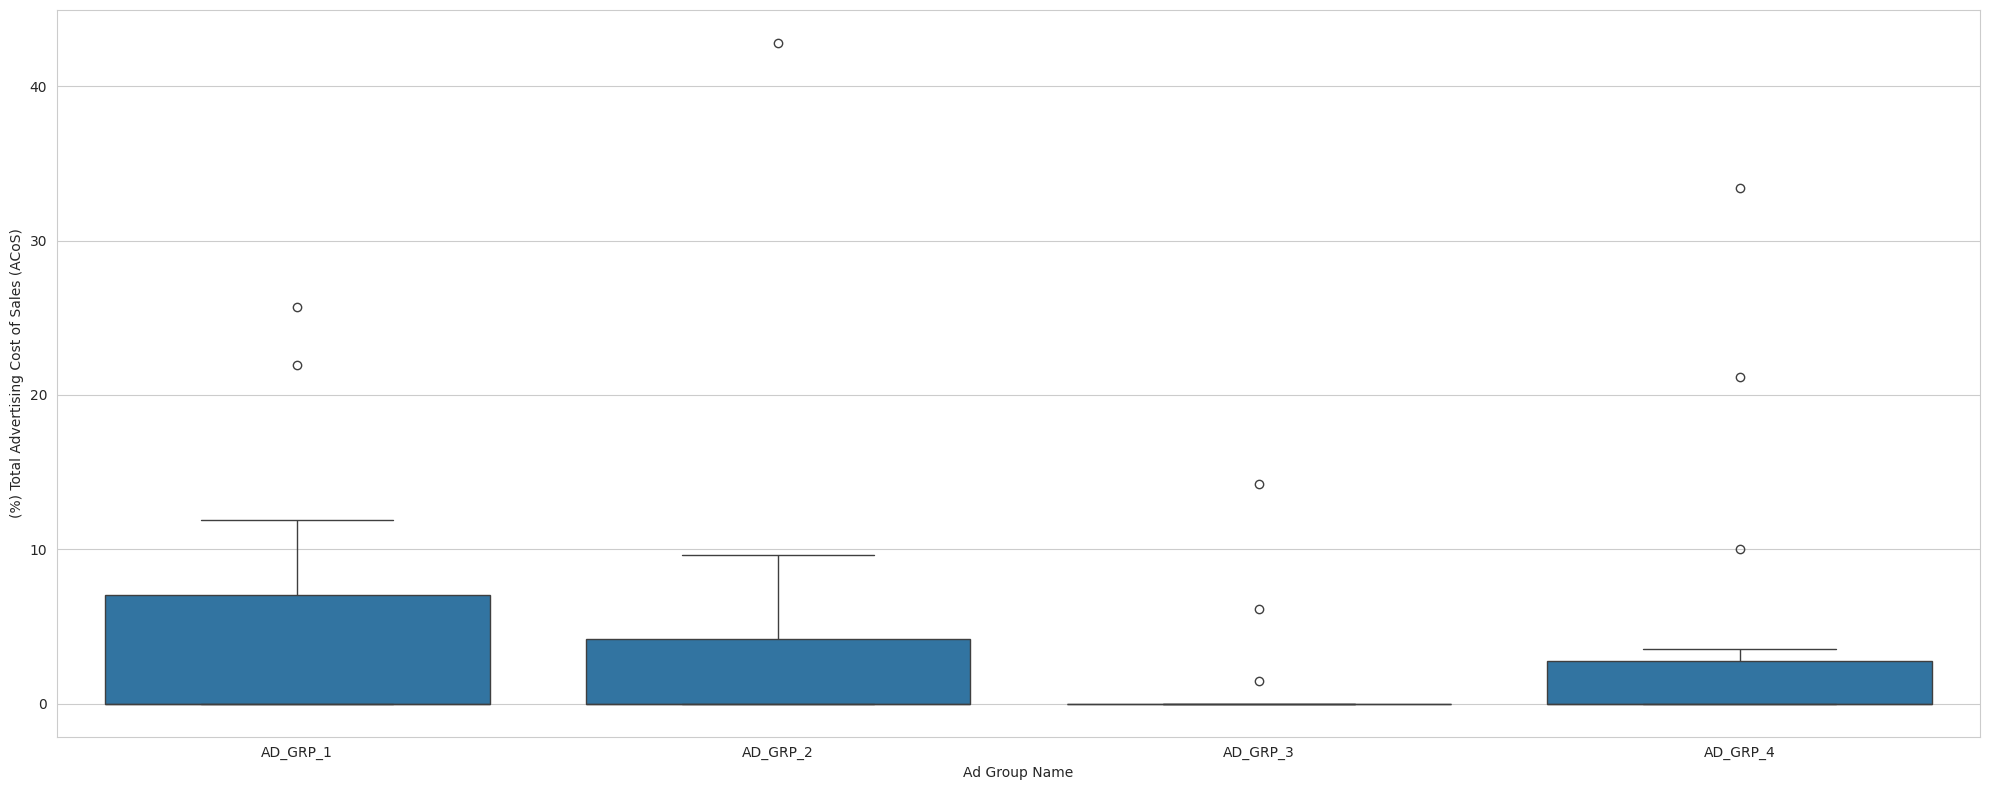

The boxplot above shows the (%) Total Advertising Cost of Sales (ACoS) for each ad group


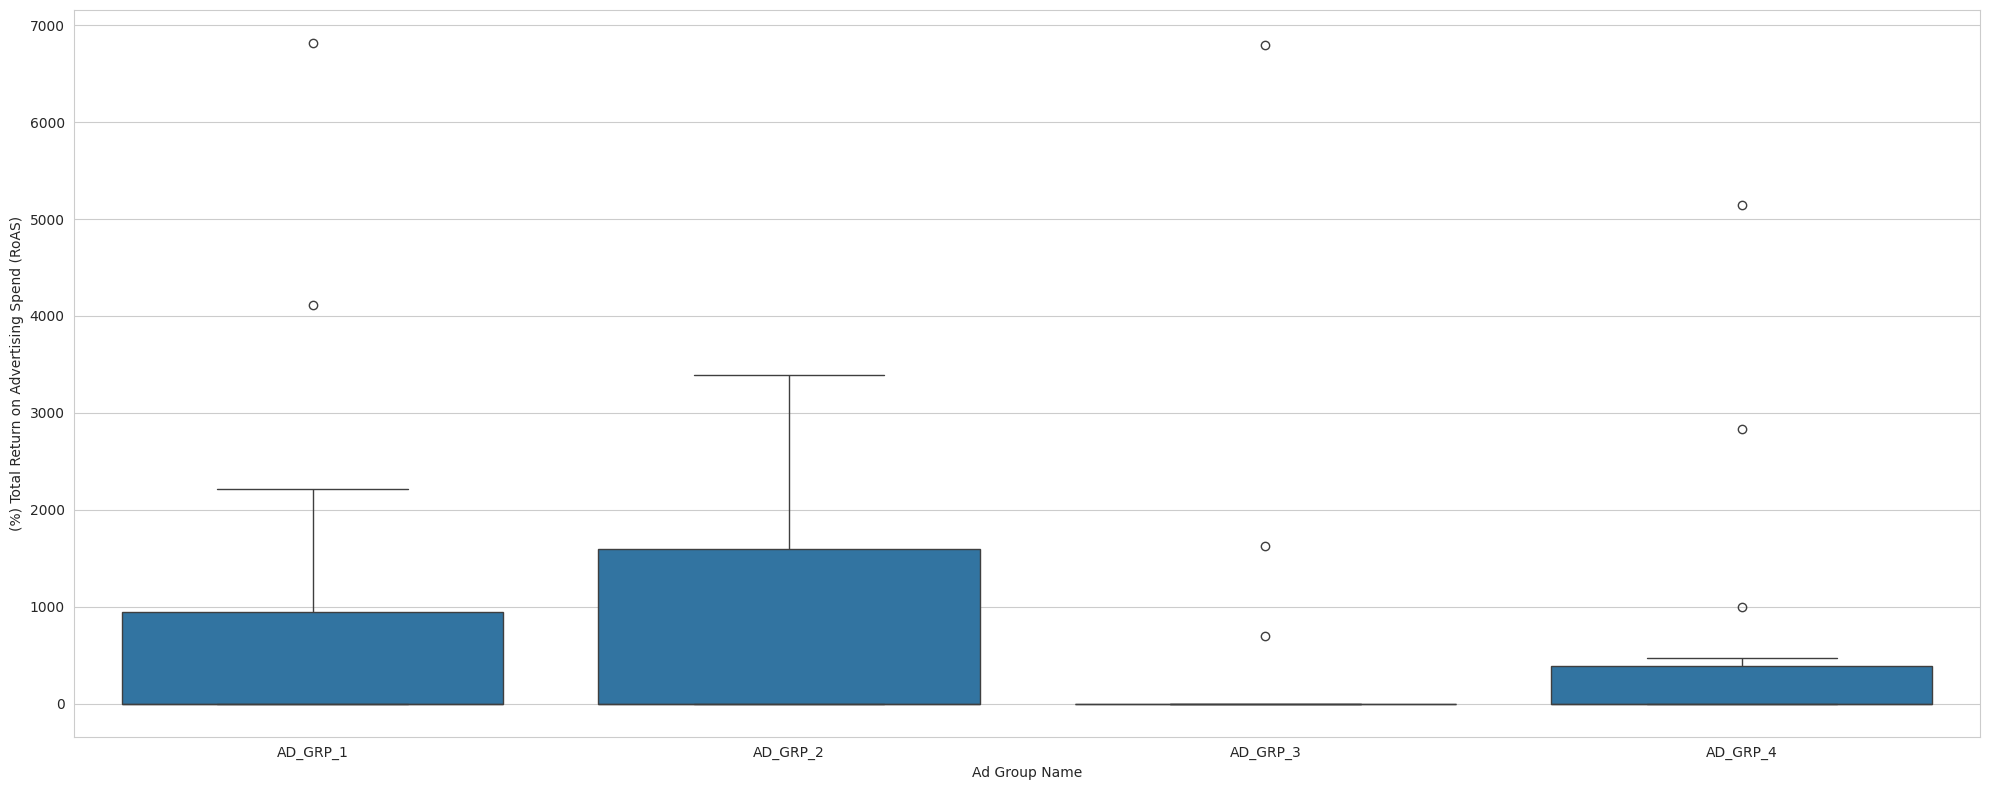

The boxplot above shows the (%) Total Return on Advertising Spend (RoAS) for each ad group


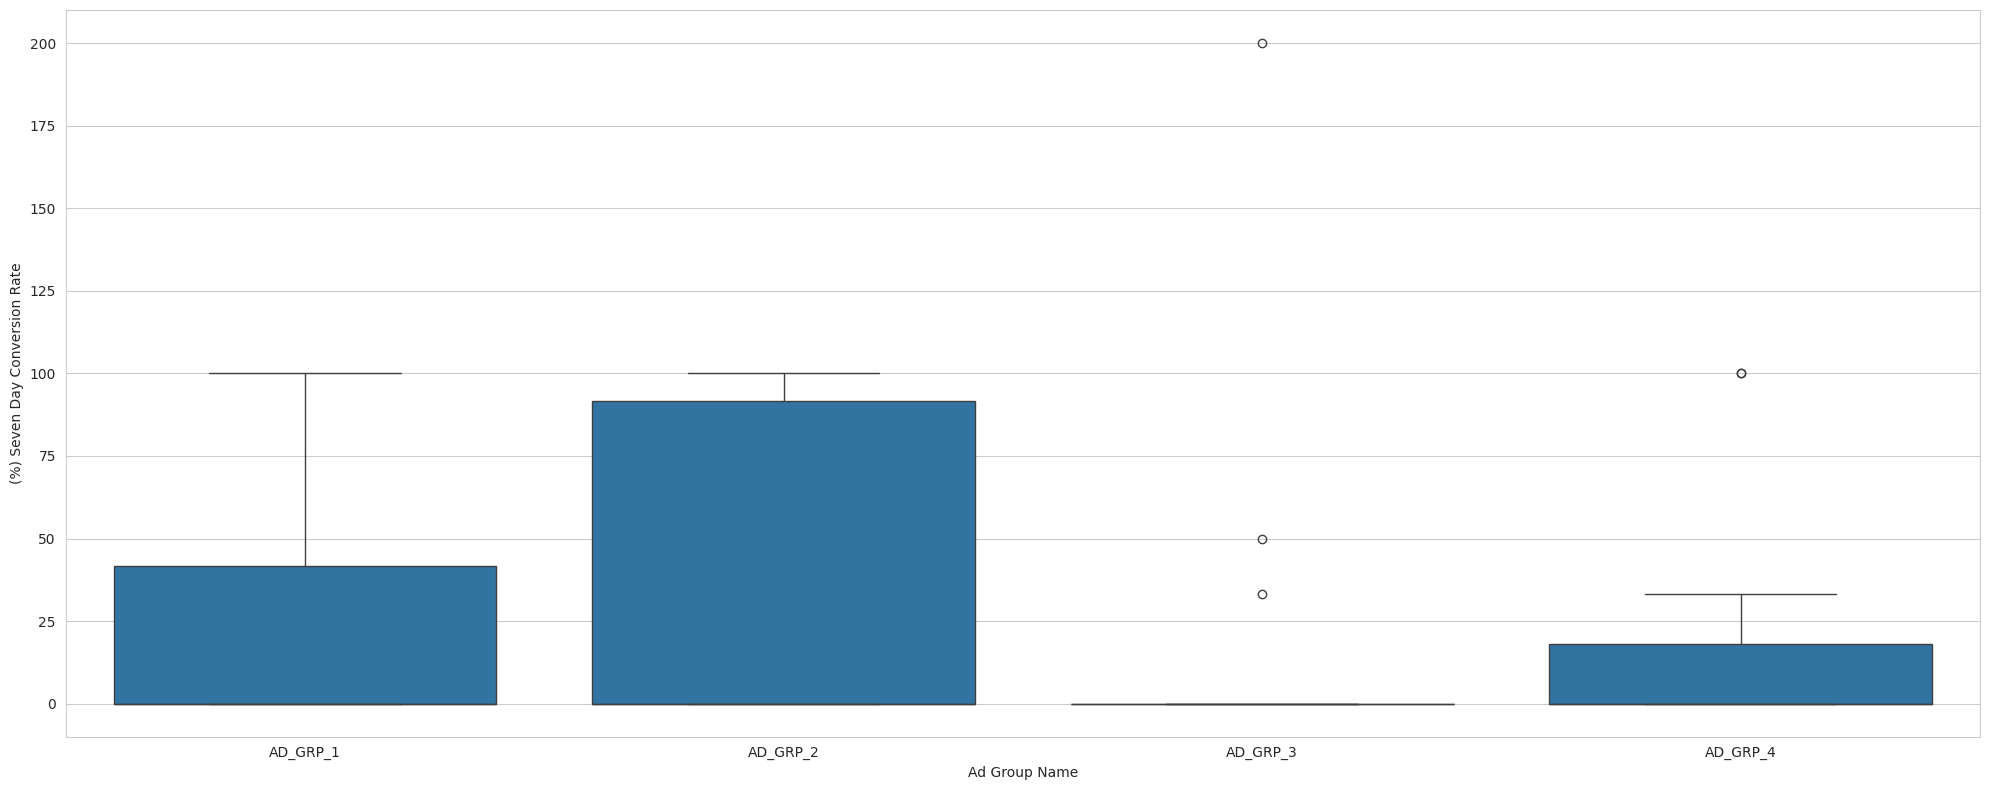

The boxplot above shows the (%) Seven Day Conversion Rate for each ad group


In [126]:
#compare the distributions of ACoS, RoAS, and conversion rate across different ad groups
sns.cubehelix_palette(start=0.5, rot=-0.5, as_cmap=True)

column_list_e = ["(%) Total Advertising Cost of Sales (ACoS)", "(%) Total Return on Advertising Spend (RoAS)", "(%) Seven Day Conversion Rate"]
for col in column_list_e:
    plt.subplots(figsize=(20,8))
    sns.boxplot(search_term_report, x="Ad Group Name", y=col)
    plt.tight_layout()
    plt.show()

    print(f"The boxplot above shows the {col} for each ad group")


> The boxplots show that while Ad Group 1 had the highest mean ACoS, Ad Group 2 outperformed with the highest mean RoAS and the highest mean conversion rate. 

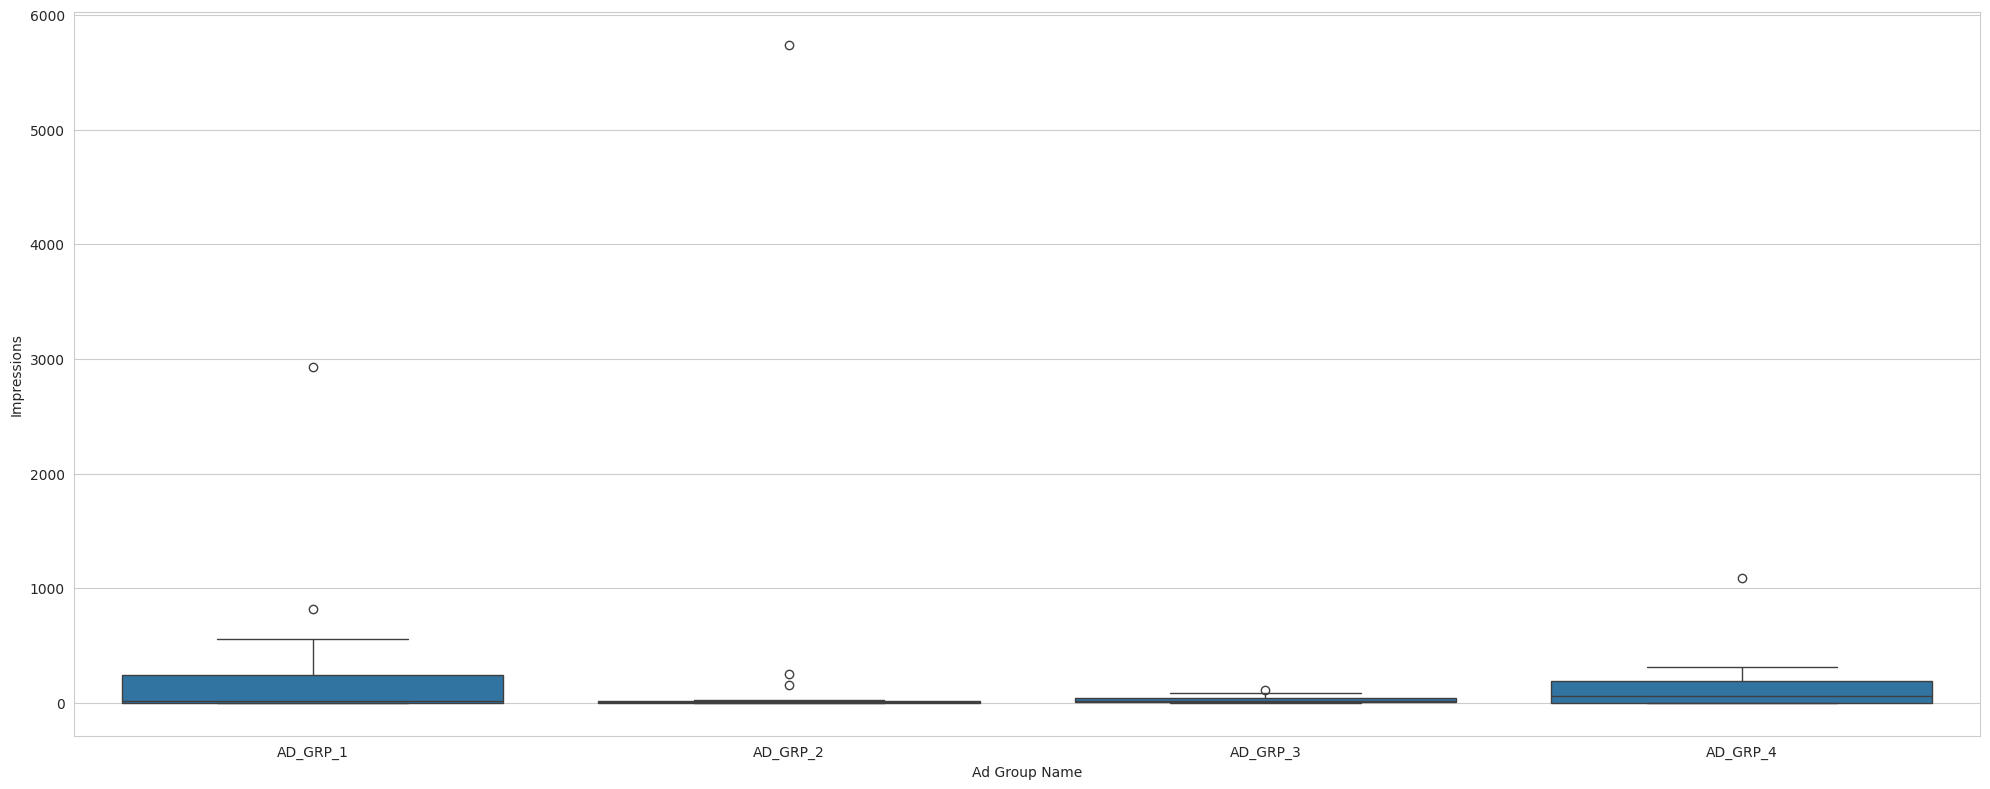

The boxplot above shows the Impressions for each ad group


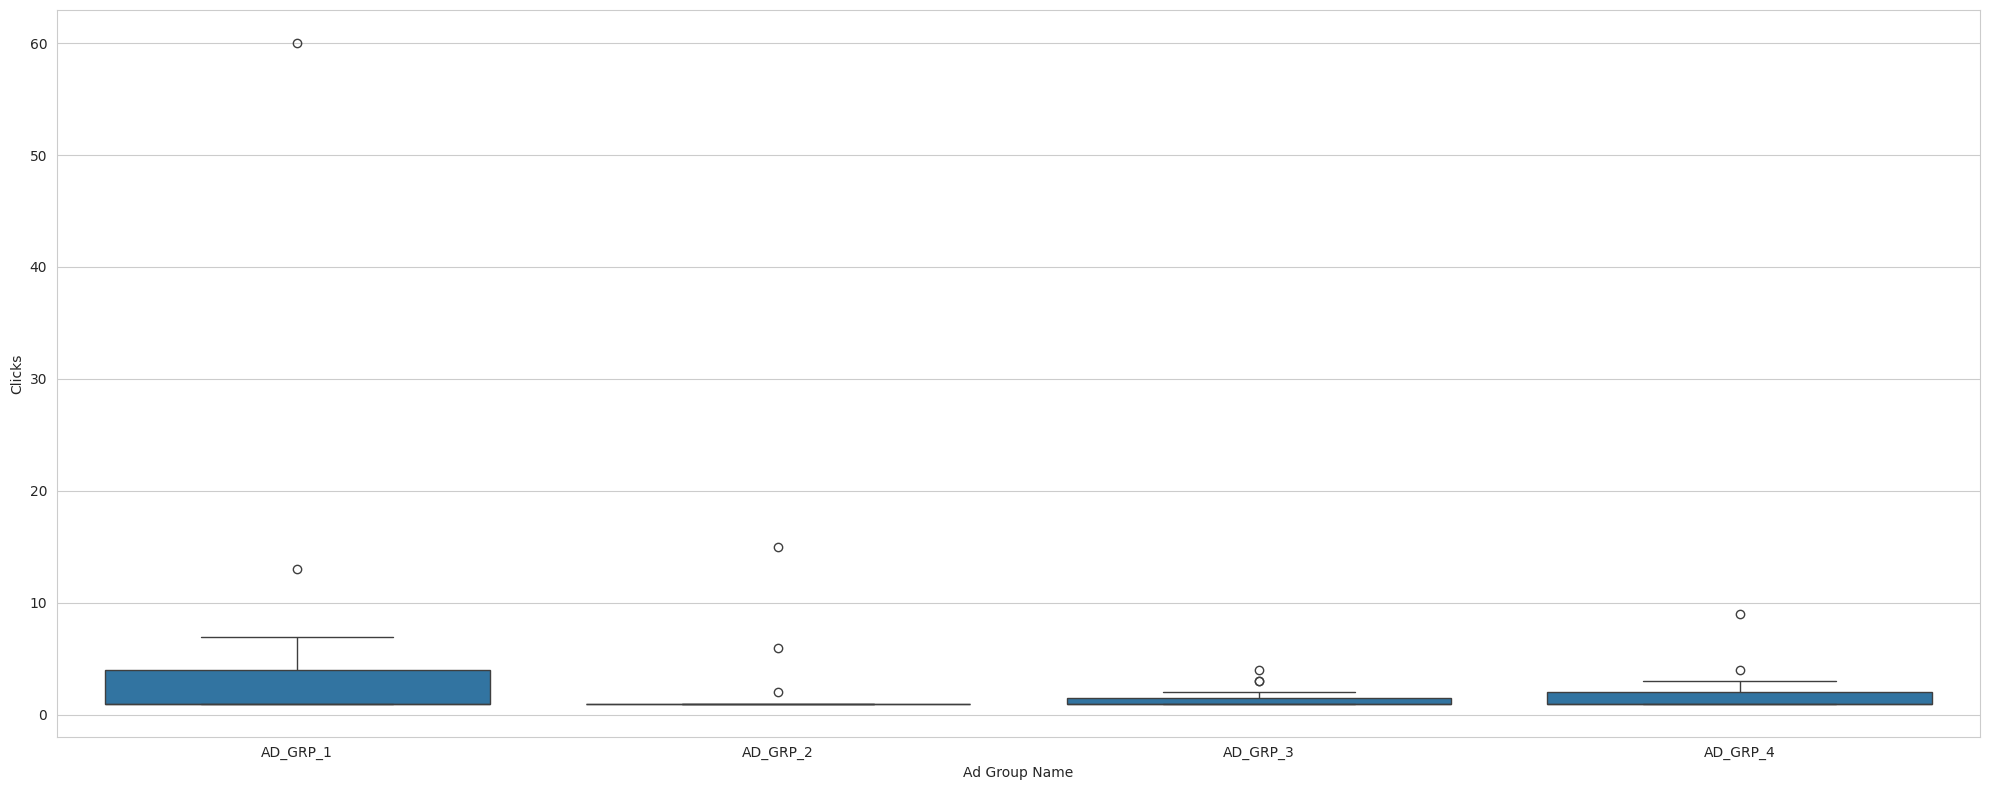

The boxplot above shows the Clicks for each ad group


In [127]:
#compare the distributions of impressions and clicks across different ad groups
column_list_e = ["Impressions", "Clicks"]
for col in column_list_e:
    plt.subplots(figsize=(20,8))
    sns.boxplot(search_term_report, x="Ad Group Name", y=col)
    plt.tight_layout()
    plt.show()

    print(f"The boxplot above shows the {col} for each ad group")


##### Check the correlation between spend and impressions, clicks, and total units sold 

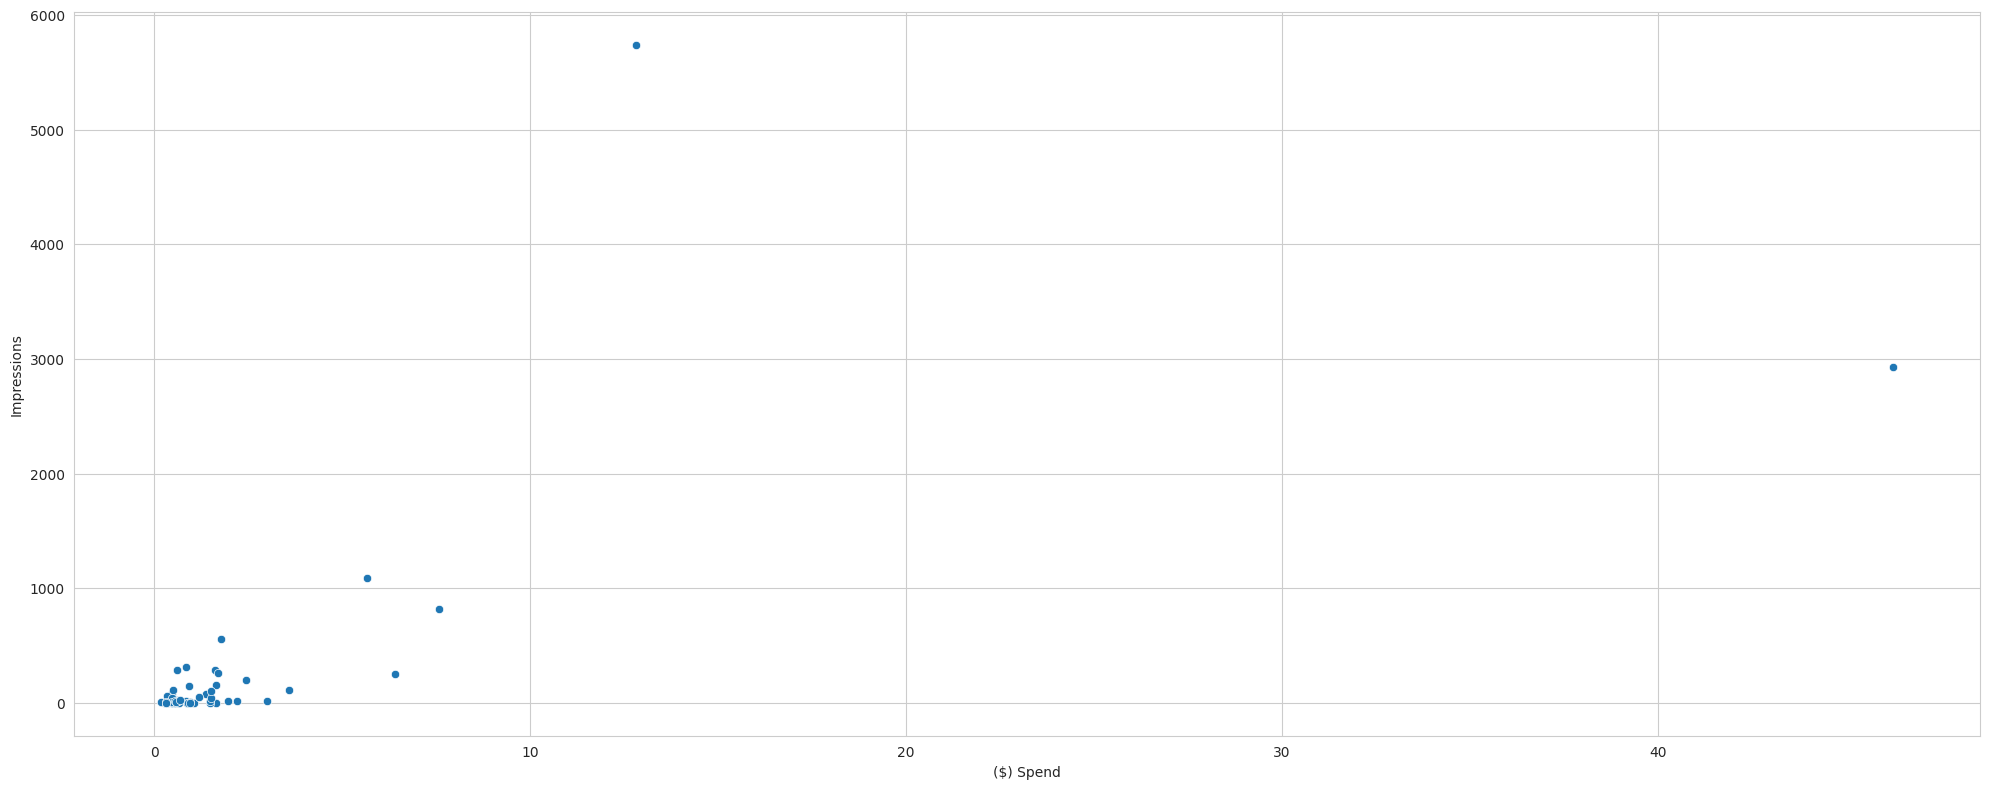

The correlation coefficient between the Spend and Impressions is: 0.6519530291753393


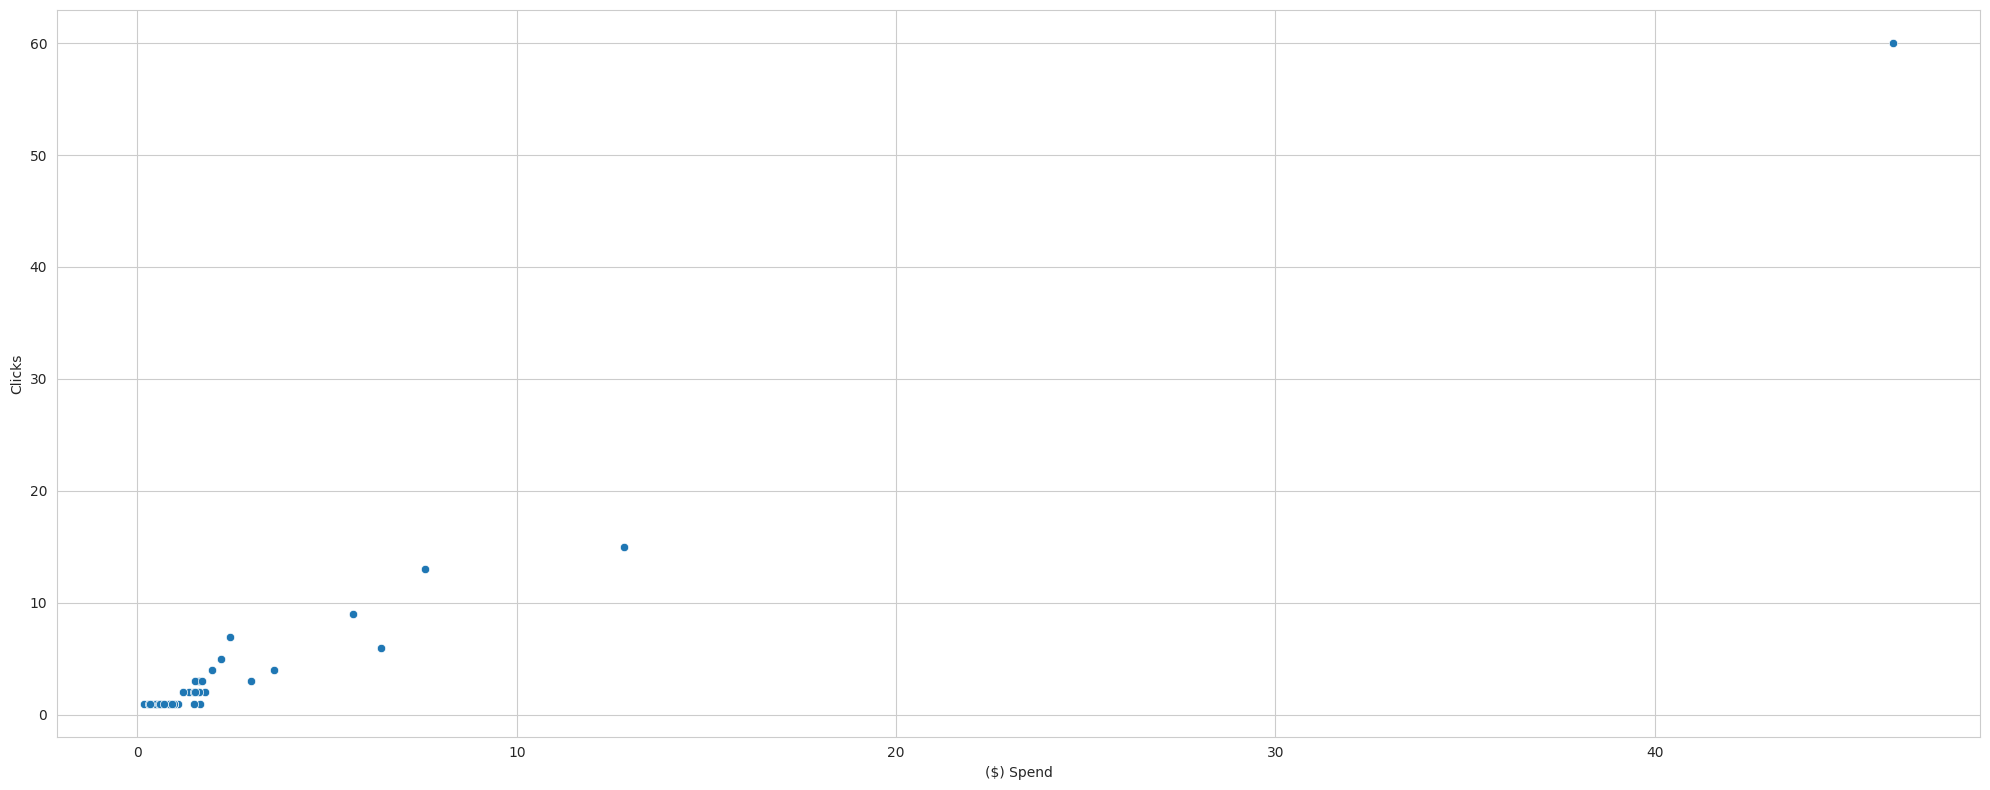

The correlation coefficient between the Spend and Clicks is: 0.993458239292472


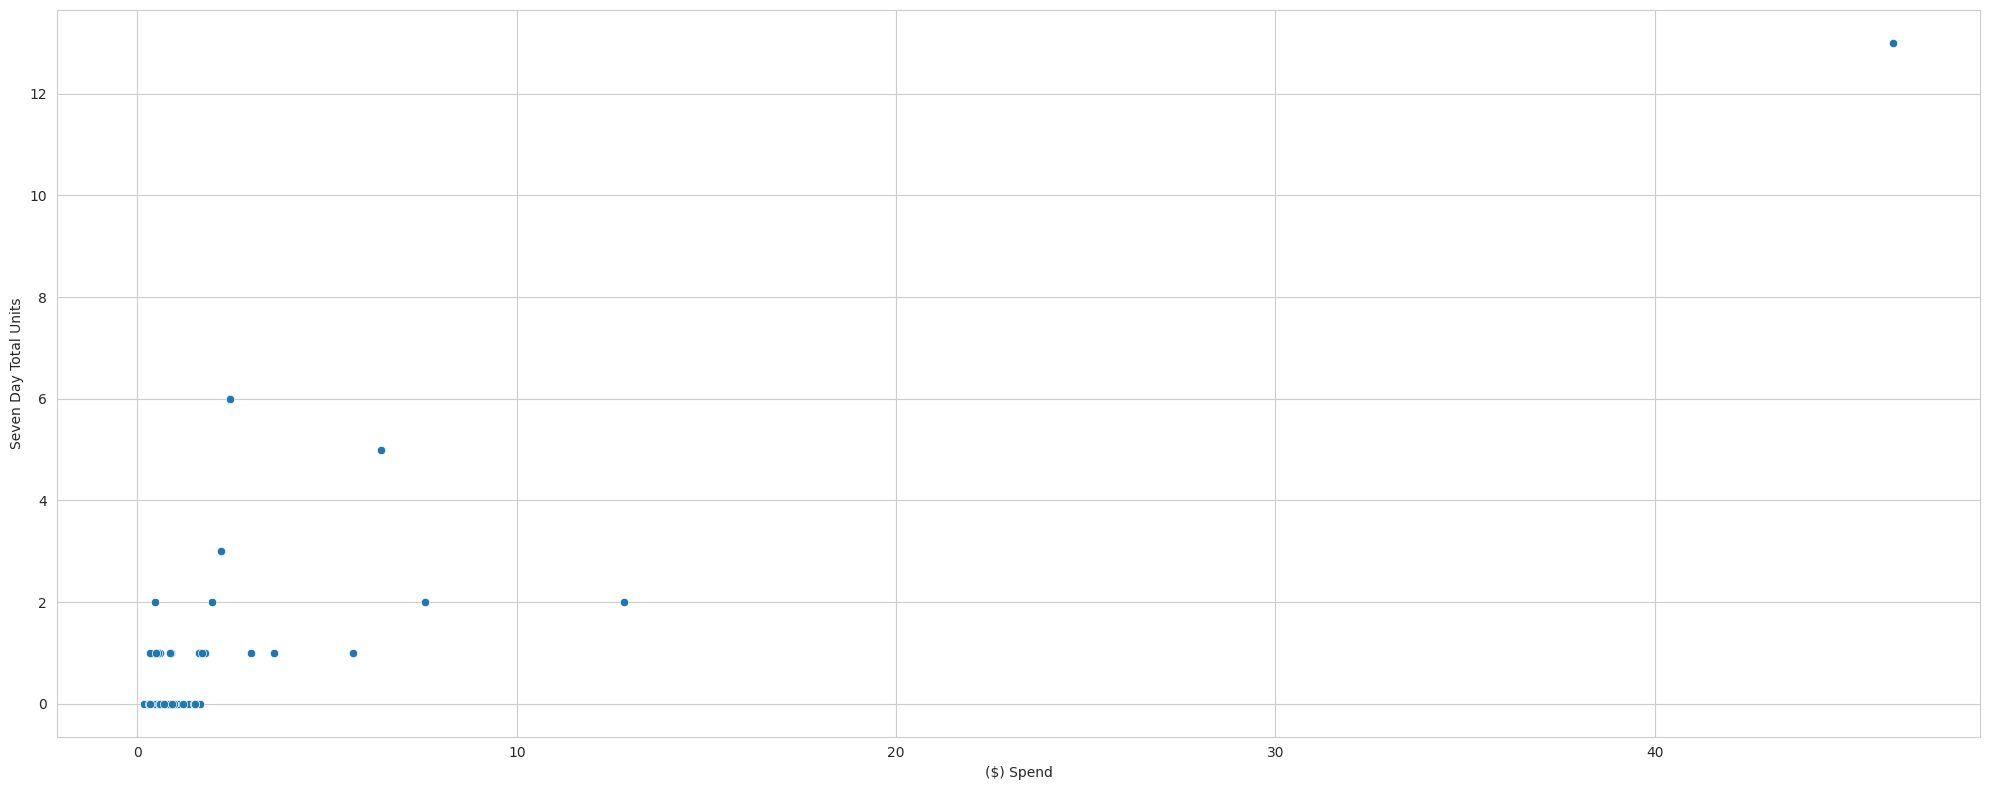

The correlation coefficient between the Spend and Seven Day Total Units is: 0.8631501767801933


In [128]:
#check the correlation between spend and impressions, clicks, and total units sold 
column_list_e = ["Impressions", "Clicks", "Seven Day Total Units"]
for col in column_list_e:
    plt.subplots(figsize=(20,8))
    sns.scatterplot(search_term_report, x="($) Spend", y=col)
    plt.tight_layout()
    plt.show()

    corr_coef = search_term_report["($) Spend"].corr(search_term_report[col])
    print(f"The correlation coefficient between the Spend and {col} is: {corr_coef}")
    

> There is a strong positive correlation between total spend and both clicks and total units sold.

##### Check the correlation between CPC and impressions, clicks, and total units sold

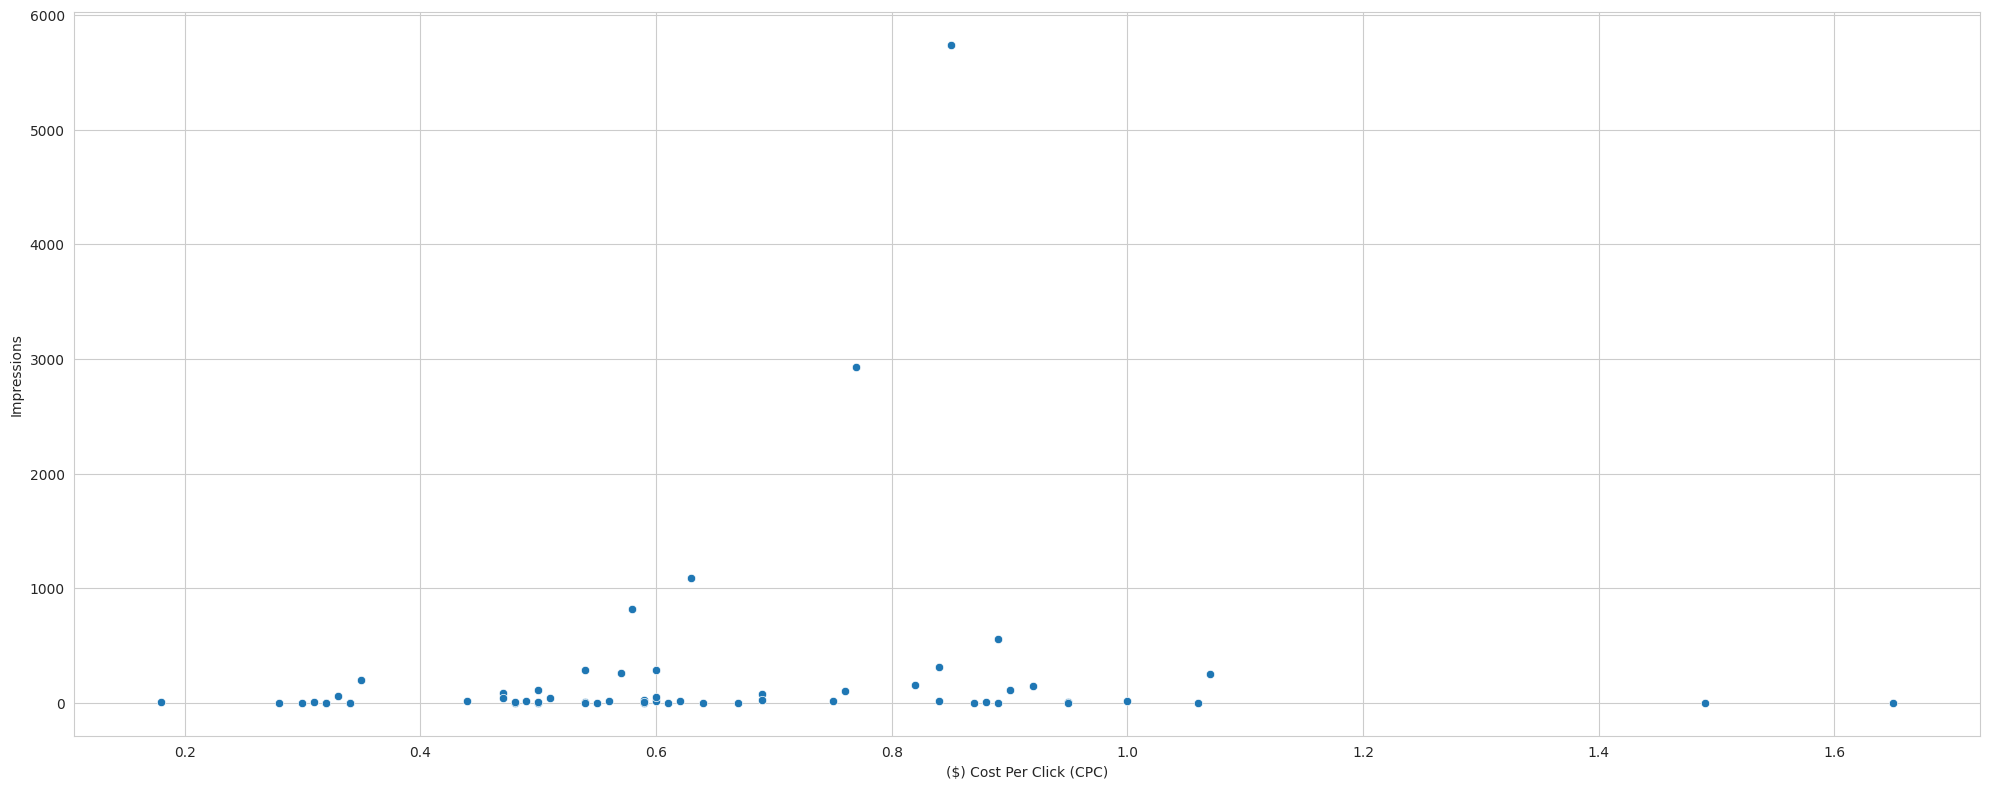

The correlation coefficient between the CPC and Impressions is: 0.11991285041813826


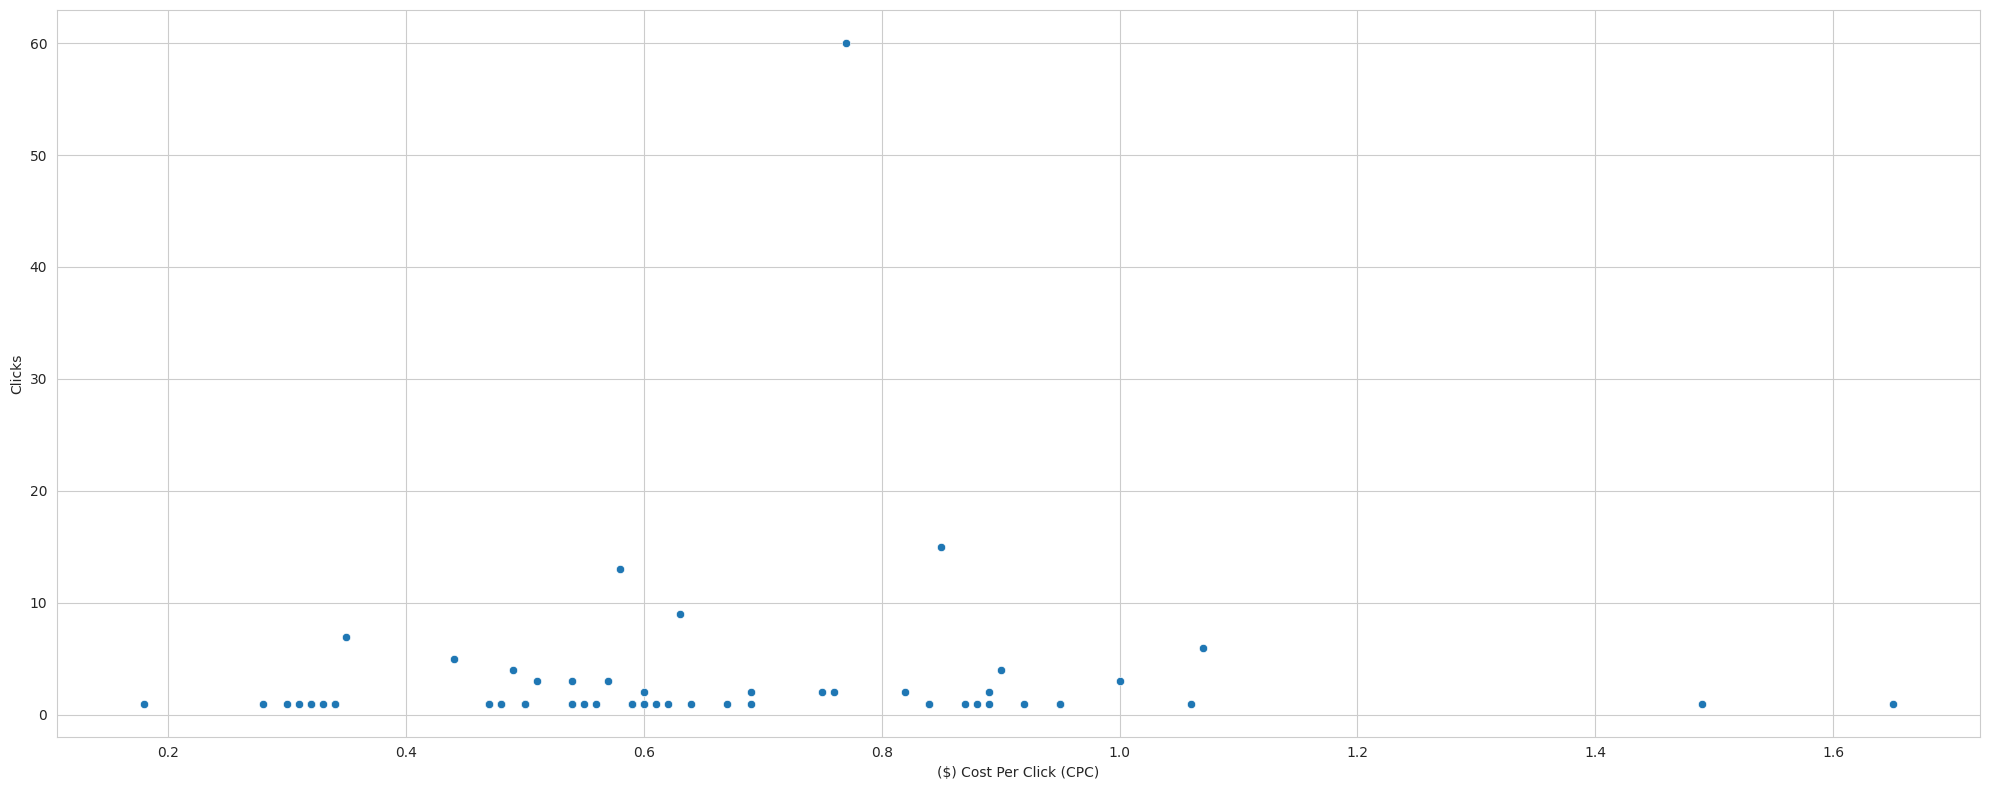

The correlation coefficient between the CPC and Clicks is: 0.07088869760977687


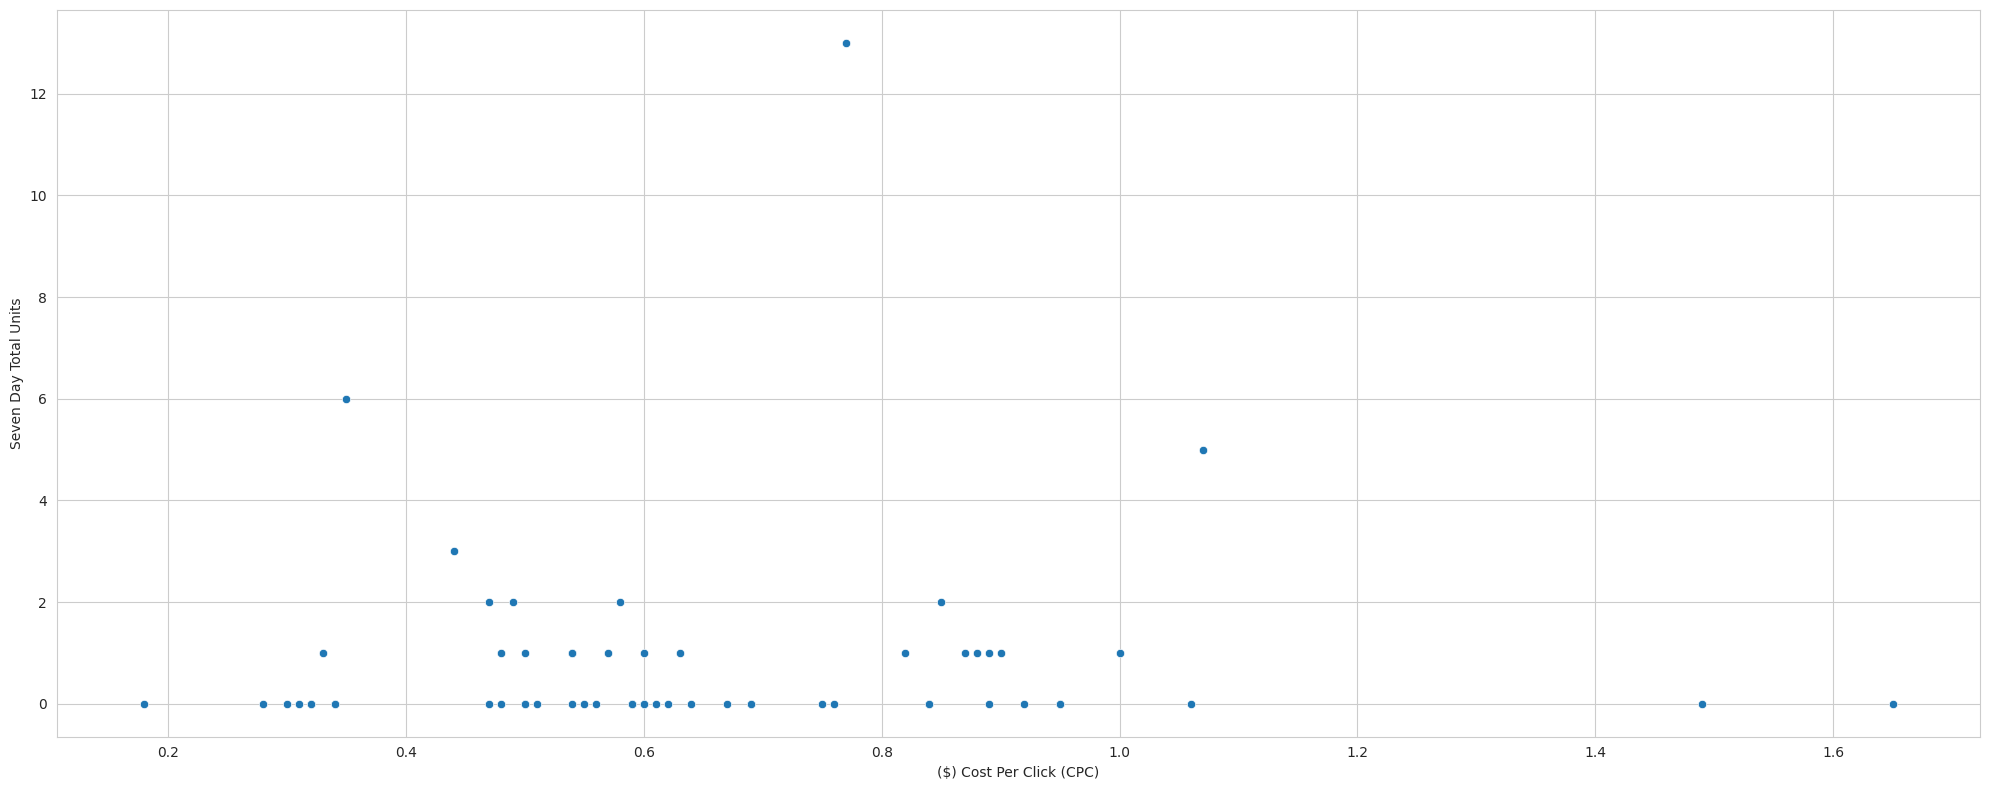

The correlation coefficient between the CPC and Seven Day Total Units is: 0.0379354823668947


In [129]:
#check the correlation between CPC and impressions, clicks, and total units sold 
column_list_e = ["Impressions", "Clicks", "Seven Day Total Units"]
for col in column_list_e:
    plt.subplots(figsize=(20,8))
    sns.scatterplot(search_term_report, x="($) Cost Per Click (CPC)", y=col)
    plt.tight_layout()
    plt.show()

    corr_coef = search_term_report["($) Cost Per Click (CPC)"].corr(search_term_report[col])
    print(f"The correlation coefficient between the CPC and {col} is: {corr_coef}")


> The scatterplots above indicate that there is no significant correlation between CPC and impressions, clicks, or total units sold.

> It seems that a higher CPC doesn’t always lead to higher total sales. We should review the bids for specific keywords and focus on improving <br/><br/> the quality and relevance of our ads.

### Part 3: AB Testing using Statistical tests

In [130]:
#create separate df for each ad group
ad_group = search_term_report.groupby("Ad Group Name")
ad_group1 = ad_group.get_group("AD_GRP_1")
ad_group2 = ad_group.get_group("AD_GRP_2")
ad_group3 = ad_group.get_group("AD_GRP_3")
ad_group4 = ad_group.get_group("AD_GRP_4")

In [131]:
import scipy.stats as stats

group_list_a = [ad_group1, ad_group2, ad_group3, ad_group4]
def perform_anova_on_groups(df_list, column_label):

    #shapiro-wilk test on each group to check for normality
    #Ho: the sample comes from a normal distribution [ p-value > 0.05 ]
    shapiro_test_pvalues = []
    for df_ in df_list:
        shapiro_res = stats.shapiro(df_[column_label])
        shapiro_test_pvalues.append(shapiro_res.pvalue)
    print(f"The p-value for the shapiro-wilk test: {shapiro_test_pvalues}")

    #levene's test on each group to check for homogeneity of variance 
    #Ho: the variances of the groups being compared are equal [ p-value > 0.05 ]
    levenes_res = stats.levene(df_list[0][column_label], df_list[1][column_label], df_list[2][column_label], df_list[3][column_label])
    print(f"The p-value for the levene's test: {levenes_res.pvalue} \n")

    
    #check if the shapiro_test_pvalues contain a p-value less than 0.05
    pvalue_less_than_0_05 = any(x < 0.05 for x in shapiro_test_pvalues)
    if pvalue_less_than_0_05 == False and levenes_res.pvalue > 0.05: #if p-value > 0.05 for both shapiro-wilk and levene's test

        #parametric test: one-way anova 
        #Ho: there is no difference among group means
        anova_res = stats.f_oneway(df_list[0][column_label], df_list[1][column_label], df_list[2][column_label], df_list[3][column_label])
        print(f"The p-value for the one way anova test: {anova_res.pvalue}")
        if anova_res.pvalue > 0.05: #if p-value > 0.05: fail to reject Ho
            print(f"Fail to reject Ho. There is no significant difference among the groups")
        else:
            print(f"Reject Ho. There is significant difference among the groups")

    else:
        #non-parametric test: kruskal-wallis test 
        #Ho: there is no difference among group means
        kruskal_res = stats.kruskal(df_list[0][column_label], df_list[1][column_label], df_list[2][column_label], df_list[3][column_label])
        print(f"The p-value for the kruskal-wallis test: {kruskal_res.pvalue}")
        if kruskal_res.pvalue > 0.05: #if p-value > 0.05: fail to reject Ho
            print(f"Fail to reject Ho. There is no significant difference among the groups")
        else:
            print(f"Reject Ho. There is significant difference among the groups")


##### Compare conversion rate among groups

In [132]:
#performing a statistical test to compare the conversion rate among groups
perform_anova_on_groups(group_list_a, column_label="(%) Seven Day Conversion Rate")


The p-value for the shapiro-wilk test: [0.001130661875698679, 0.0002713743476341294, 9.600032435542079e-07, 1.5750716589228927e-05]
The p-value for the levene's test: 0.6180750288490171 

The p-value for the kruskal-wallis test: 0.38507860914867376
Fail to reject Ho. There is no significant difference among the groups


##### Compare Total ACoS among groups

In [133]:
#performing a statistical test to compare the Total ACoS among groups
perform_anova_on_groups(group_list_a, column_label="(%) Total Advertising Cost of Sales (ACoS)")

The p-value for the shapiro-wilk test: [0.0001582554539663183, 3.857550200840494e-06, 1.4016750418377072e-06, 1.2122012717141086e-05]
The p-value for the levene's test: 0.6104101224385128 

The p-value for the kruskal-wallis test: 0.3886491966352765
Fail to reject Ho. There is no significant difference among the groups


##### Compare Total RoAS among groups

In [134]:
#performing a statistical test to compare the Total RoAS among groups
perform_anova_on_groups(group_list_a, column_label="(%) Total Return on Advertising Spend (RoAS)")

The p-value for the shapiro-wilk test: [4.370295783101673e-05, 0.00047254924549733904, 6.66045158491483e-07, 6.6295062570964296e-06]
The p-value for the levene's test: 0.847930457869301 

The p-value for the kruskal-wallis test: 0.41102570566941277
Fail to reject Ho. There is no significant difference among the groups


##### Perform a post-hoc test

In [135]:
#post-hoc test function below only includes tukey's and dunn's test
def post_hoc_test_func(column_label, parametric="yes"): #specify if the post-hoc test is parametric 
    if parametric == "yes":
        #perform tukey's hsd test 
        res = stats.tukey_hsd(ad_group1[column_label], ad_group2[column_label], ad_group3[column_label], ad_group4[column_label])
        print(f"{column_label}")
        print(f"{res} \n")        
    
    else:
        #perform dunn's test 
        res = sp.posthoc_dunn([ad_group1[column_label], ad_group2[column_label], ad_group3[column_label], ad_group4[column_label]])
        print(f"{column_label}")
        print(f"Dunn's test Pairwise Group Comparisons")
        print(f"{res} \n")

column_list_e = ["(%) Seven Day Conversion Rate", "(%) Total Advertising Cost of Sales (ACoS)", "(%) Total Return on Advertising Spend (RoAS)"]
for col in column_list_e:
    post_hoc_test_func(column_label=col, parametric="no") 

(%) Seven Day Conversion Rate
Dunn's test Pairwise Group Comparisons
          1         2         3         4
1  1.000000  0.725279  0.211988  0.497399
2  0.725279  1.000000  0.109703  0.303010
3  0.211988  0.109703  1.000000  0.568997
4  0.497399  0.303010  0.568997  1.000000 

(%) Total Advertising Cost of Sales (ACoS)
Dunn's test Pairwise Group Comparisons
          1         2         3         4
1  1.000000  0.937293  0.124260  0.509487
2  0.937293  1.000000  0.144713  0.561264
3  0.124260  0.144713  1.000000  0.380216
4  0.509487  0.561264  0.380216  1.000000 

(%) Total Return on Advertising Spend (RoAS)
Dunn's test Pairwise Group Comparisons
          1         2         3         4
1  1.000000  0.942109  0.167659  0.424400
2  0.942109  1.000000  0.146395  0.383519
3  0.167659  0.146395  1.000000  0.561272
4  0.424400  0.383519  0.561272  1.000000 



> It appears that there are no statistically significant differences among the ad groups in terms of conversion rate, ROAS, and ACOS. <br/><br/>

> This indicates that we lack sufficient evidence to conclude that the observed effects are not due to random chance. <br/><br/>

> Next, we can conduct bayesian ab testing to assess the probability of future performance of each ad group.

### Part 4: Bayesian AB Testing


> Groups 1 and 2 have the highest mean conversion rates among the ad groups, with means of 24.406 and 36.443, respectively. <br/><br/>

> To determine the probability that Group 2 has a better conversion rate than Group 1, we'll perform a bayesian ab test.  

In [155]:
#get the probability that a group2 will have better conversion rate than group1
def bayesian_ab_testing_for_conversion(group1, group2, column_label1, column_label2):
    #define prior parameters 
    alpha_a, alpha_b = 1, 1 #successes for each group 
    beta_a, beta_b = 1, 1 #failures for each group 
    
    #update posterior parameters
    successes_a = group1[column_label1].sum() #column_label1 = total units sold 
    failures_a = group1[column_label2].sum() #column_label2 = clicks

    successes_b = group2[column_label1].sum()
    failures_b = group2[column_label2].sum()

    print(f"Group1: {[successes_a, failures_a]}")
    print(f"Group2: {[successes_b, failures_b]}")
    
    #generate samples from the posterior distribution
    new_conversion_rate_1 = np.random.beta(successes_a + alpha_a, failures_a + beta_a, size=100000)
    new_conversion_rate_2 = np.random.beta(successes_b + alpha_b, failures_b + beta_b, size=100000)

    probability_of_2_over_1 = np.sum(new_conversion_rate_2 > new_conversion_rate_1)/100000
    
    return probability_of_2_over_1

bayesian_ab_testing_for_conversion(ad_group1, ad_group2, "Seven Day Total Units", "Clicks")

Group1: [27, 100]
Group2: [12, 35]


0.74312

> Based on the Bayesian analysis, there is approximately a 73.96% chance that Group 2 has a higher conversion rate than Group 1.

In [176]:
#get the probability that group1 will exceed a threshold conversion rate
def bayesian_ab_testing_for_conversion(group1, column_label1, column_label2, target_conversion_rate=0.20):
    #define prior parameters 
    alpha_a, beta_a = 1, 1 #successes and failures for ad group

    #update posterior parameters
    successes_a = group1[column_label1].sum() #column_label1 = total units sold 
    failures_a = group1[column_label2].sum() #column_label2 = clicks
    print(f"Group successes and failures: {[successes_a, failures_a]}")

    #generate samples from the posterior distribution
    new_conversion_rate_1 = np.random.beta(successes_a + alpha_a, failures_a + beta_a, size=100000)
    probability_of_group1 = np.sum(new_conversion_rate_1 > target_conversion_rate)/100000

    return probability_of_group1

bayesian_ab_testing_for_conversion(ad_group1, "Seven Day Total Units", "Clicks", target_conversion_rate=0.23)

Group successes and failures: [27, 100]


0.34769

> Although there's a 73.96% probability that ad group 2 outperforms ad group 1, the likelihood of ad group 2 achieving a conversion <br/><br/>
> rate higher than 23% is only 34.77%. <br/><br/>

> Since a 23% conversion rate is relatively modest, there is significant potential for improvement in both ad groups.

##### Recommendations:

> The highest-performing ad group among the four still has a relatively low conversion rate. To address this, it’s crucial to ensure that <br/><br/> 
> the landing page is closely aligned with the ad's content and provides a clear, straightforward path to conversion. <br/><br/>

> Additionally, conducting ab testing on product images and copywriting can help identify elements that resonate better with the audience <br/><br/>
> and improve overall conversion rates.